<a href="https://colab.research.google.com/github/rzeta0/Make-Your-Own-Mandelbrot/blob/main/3d_Mandelbrot_landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** 3D Mandelbrot Landscape **

"Make Your Own Mandelbrot" Second Edition

This work is licensed under CC BY-SA 4.0

In [17]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage

from matplotlib import cm
from matplotlib.colors import LightSource

In [18]:
# number of pixels wide and high
resolution = 512

# bottom left corner of square viewport
bottom_left = complex(-1.6,-0.8)
#bottom_left = complex(-2.25,-1.55)


# width and height of square viewport
size = 1.1
#size = 3

# maximum iterations per test
max_iter = 128

In [19]:
# create image as numpy arrray

image = np.full( (resolution,resolution), 255)

In [20]:
# test each point in viewport for divergence

# visit every pixel in the image array
for x in range(resolution):
  for y in range(resolution):

    # convert pixel grid location x,y to complex point c
    c = bottom_left + (size * complex(x/(resolution-1), y/(resolution-1)))

    # test for divergence
    z = complex(0,0)
    for iteration_count in range(1,max_iter+1):
      z = (z*z) + c
      if (abs(z)>2): break
      pass

    # colour pixel according to divergence
    image[y,x] = (255/15) * ((max_iter - iteration_count) % 16)

    pass # end y loop
  pass # end x loop

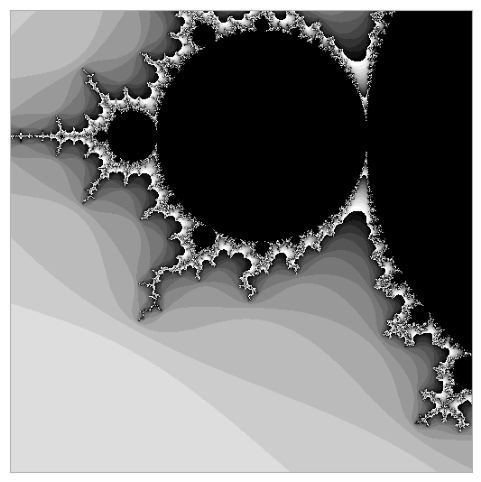

In [21]:
# render image

# create figure of size 6x6
fig, ax = plt.subplots()
fig.set_size_inches(6,6)

# turn of axis ticks
ax.set_xticks([])
ax.set_yticks([])

# grey outline
grey_value = str(0.7)
ax.spines['bottom'].set_color(grey_value)
ax.spines['top'].set_color(grey_value)
ax.spines['right'].set_color(grey_value)
ax.spines['left'].set_color(grey_value)

# plot image array, using grey colour palette
ax.imshow(image, cmap='gray', origin="lower")

# export the figure as a PNG image file
plt.savefig("mandelbrot_greyscale.png", dpi=600, format="png")

plt.show()

In [22]:
# set up 3d grid
xs = np.linspace(bottom_left.real, bottom_left.real + size, resolution)
ys = np.linspace(bottom_left.imag, bottom_left.imag + size, resolution)
xx, yy = np.meshgrid(xs, ys)

print(xx.shape)

(512, 512)


In [23]:
# Prepare heights

# take log to reduce large values
image2 = np.log(255-image+1)

# smooth sharp changes
image2 = ndimage.gaussian_filter(image2, sigma=1.5)

# sea level
image2 = np.where(image2 > 3, image2, 3)

print(image2.min(), image2.max())

3.0 5.545177444479562


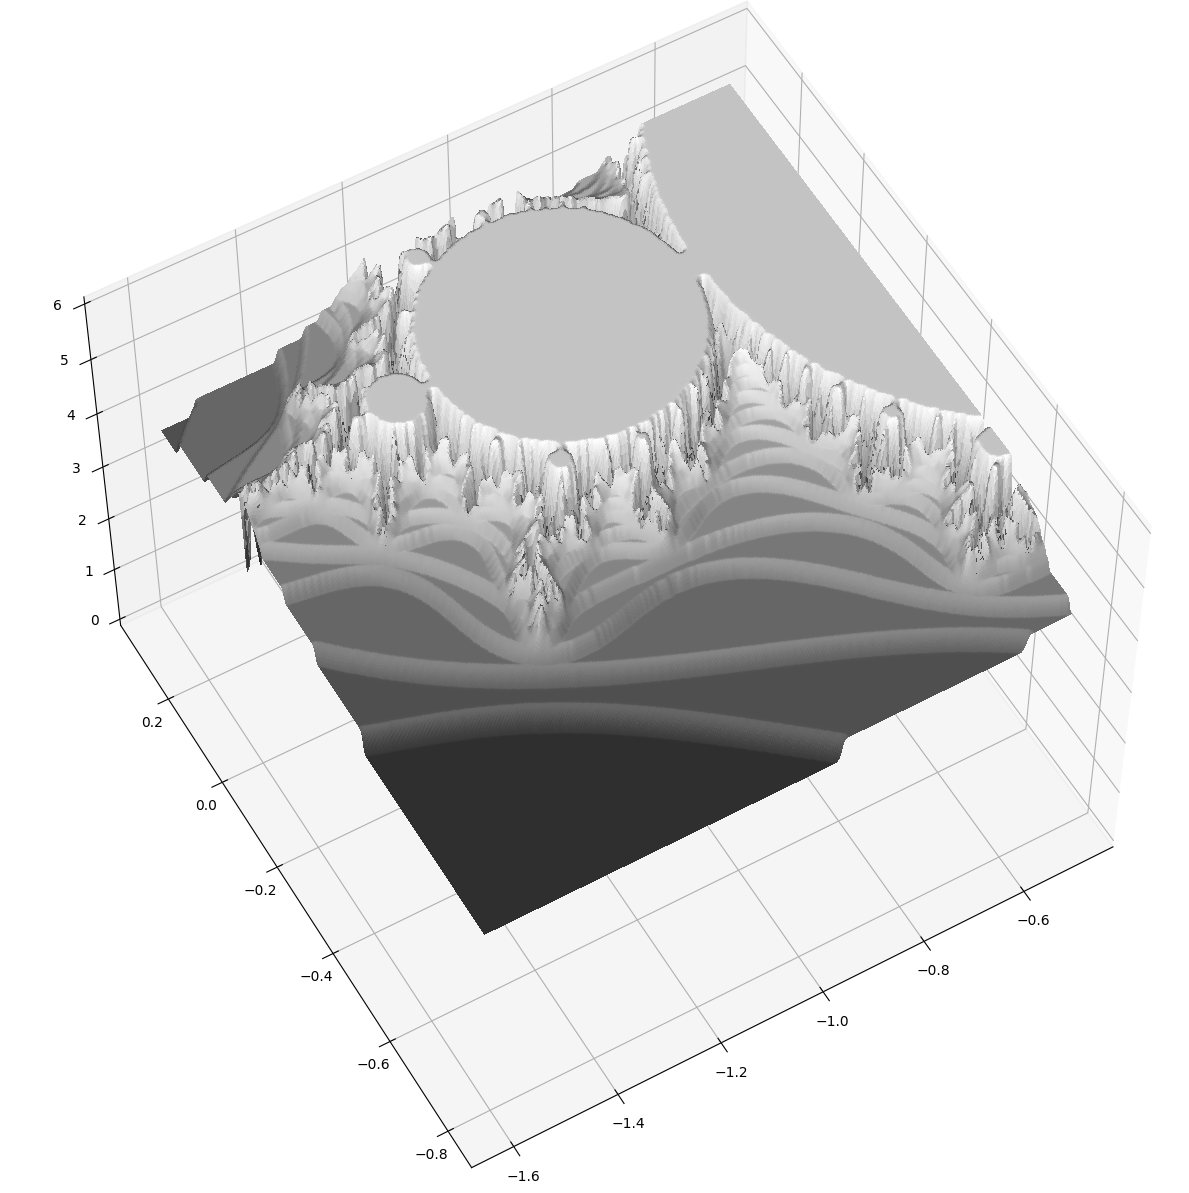

In [24]:
# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
fig.set_size_inches(12,12)

# light source and shading
ls = LightSource(270, 45)
rgb = ls.shade(image2, cmap=cm.gist_gray, vert_exag=0.1, blend_mode='soft')

# set vertical axis min/max
ax.axes.set_zlim3d(bottom=0, top=6)

# surface plot
surf = ax.plot_surface(xx, yy , image2, rstride=1, cstride=1, facecolors=rgb, linewidth=0, antialiased=False, shade=True)

# camera view
ax.view_init(55, -120)

# save as png file
plt.tight_layout()
plt.savefig("3d_mandelbrot.png", dpi=600, format="png")

plt.show()